In [3]:
from tensorflow import keras
from pathlib import Path


In [4]:
train_path = Path(
    "c:/Users/USER/Desktop/Farm-Insects-Classification/artifacts/data_ingestion/data/farm-insects-splitted/train"
)

valid_path = Path(
    "c:/Users/USER/Desktop/Farm-Insects-Classification/artifacts/data_ingestion/data/farm-insects-splitted/val"
)



In [4]:
train_path.exists()

True

In [4]:
resize_and_rescale = keras.Sequential([
    keras.layers.Resizing(224, 224),
    keras.layers.Rescaling(1./255)
])

In [5]:
train_data = keras.utils.image_dataset_from_directory(train_path,
                                                      batch_size = 16,
                                                      image_size = [224, 224],
                                                      shuffle = True) 
# train_data_scaled = train_data.map(lambda x, y: (resize_and_rescale(x, training=True), y)) #type: ignore

Found 949 files belonging to 15 classes.


In [11]:
train_data_scaled = train_data.map(lambda x, y: (resize_and_rescale(x, training=True), y)) #type: ignore

In [12]:
augmentation = keras.Sequential([
                keras.layers.RandomFlip(),
                keras.layers.RandomRotation(0.2),
                keras.layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3))
            ])

train_data_aug = train_data_scaled.map(lambda x, y: (augmentation(x, training=True), y)) 

In [13]:
valid_data =train_data = keras.utils.image_dataset_from_directory(valid_path,
                                                      batch_size = 16,
                                                      image_size = [224, 224],
                                                      shuffle = False) 

Found 311 files belonging to 15 classes.


In [129]:
get_aug_data = train_data_aug.as_numpy_iterator()

In [7]:
train_data.class_names

['Africanized Honey Bees (Killer Bees)',
 'Aphids',
 'Armyworms',
 'Brown Marmorated Stink Bugs',
 'Cabbage Loopers',
 'Citrus Canker',
 'Colorado Potato Beetles',
 'Corn Borers',
 'Corn Earworms',
 'Fall Armyworms',
 'Fruit Flies',
 'Spider Mites',
 'Thrips',
 'Tomato Hornworms',
 'Western Corn Rootworms']

In [7]:
get_data = train_data.as_numpy_iterator() #type: ignore

In [8]:
batch = get_data.next()

In [9]:
batch[0].max()

255.0

In [10]:
batch[0].shape

(16, 224, 224, 3)

In [151]:
import numpy as np
func = np.vectorize(lambda x: train_data.class_names[x]) #type: ignore
labels = func(batch[1])

In [36]:
import matplotlib.pyplot as plt

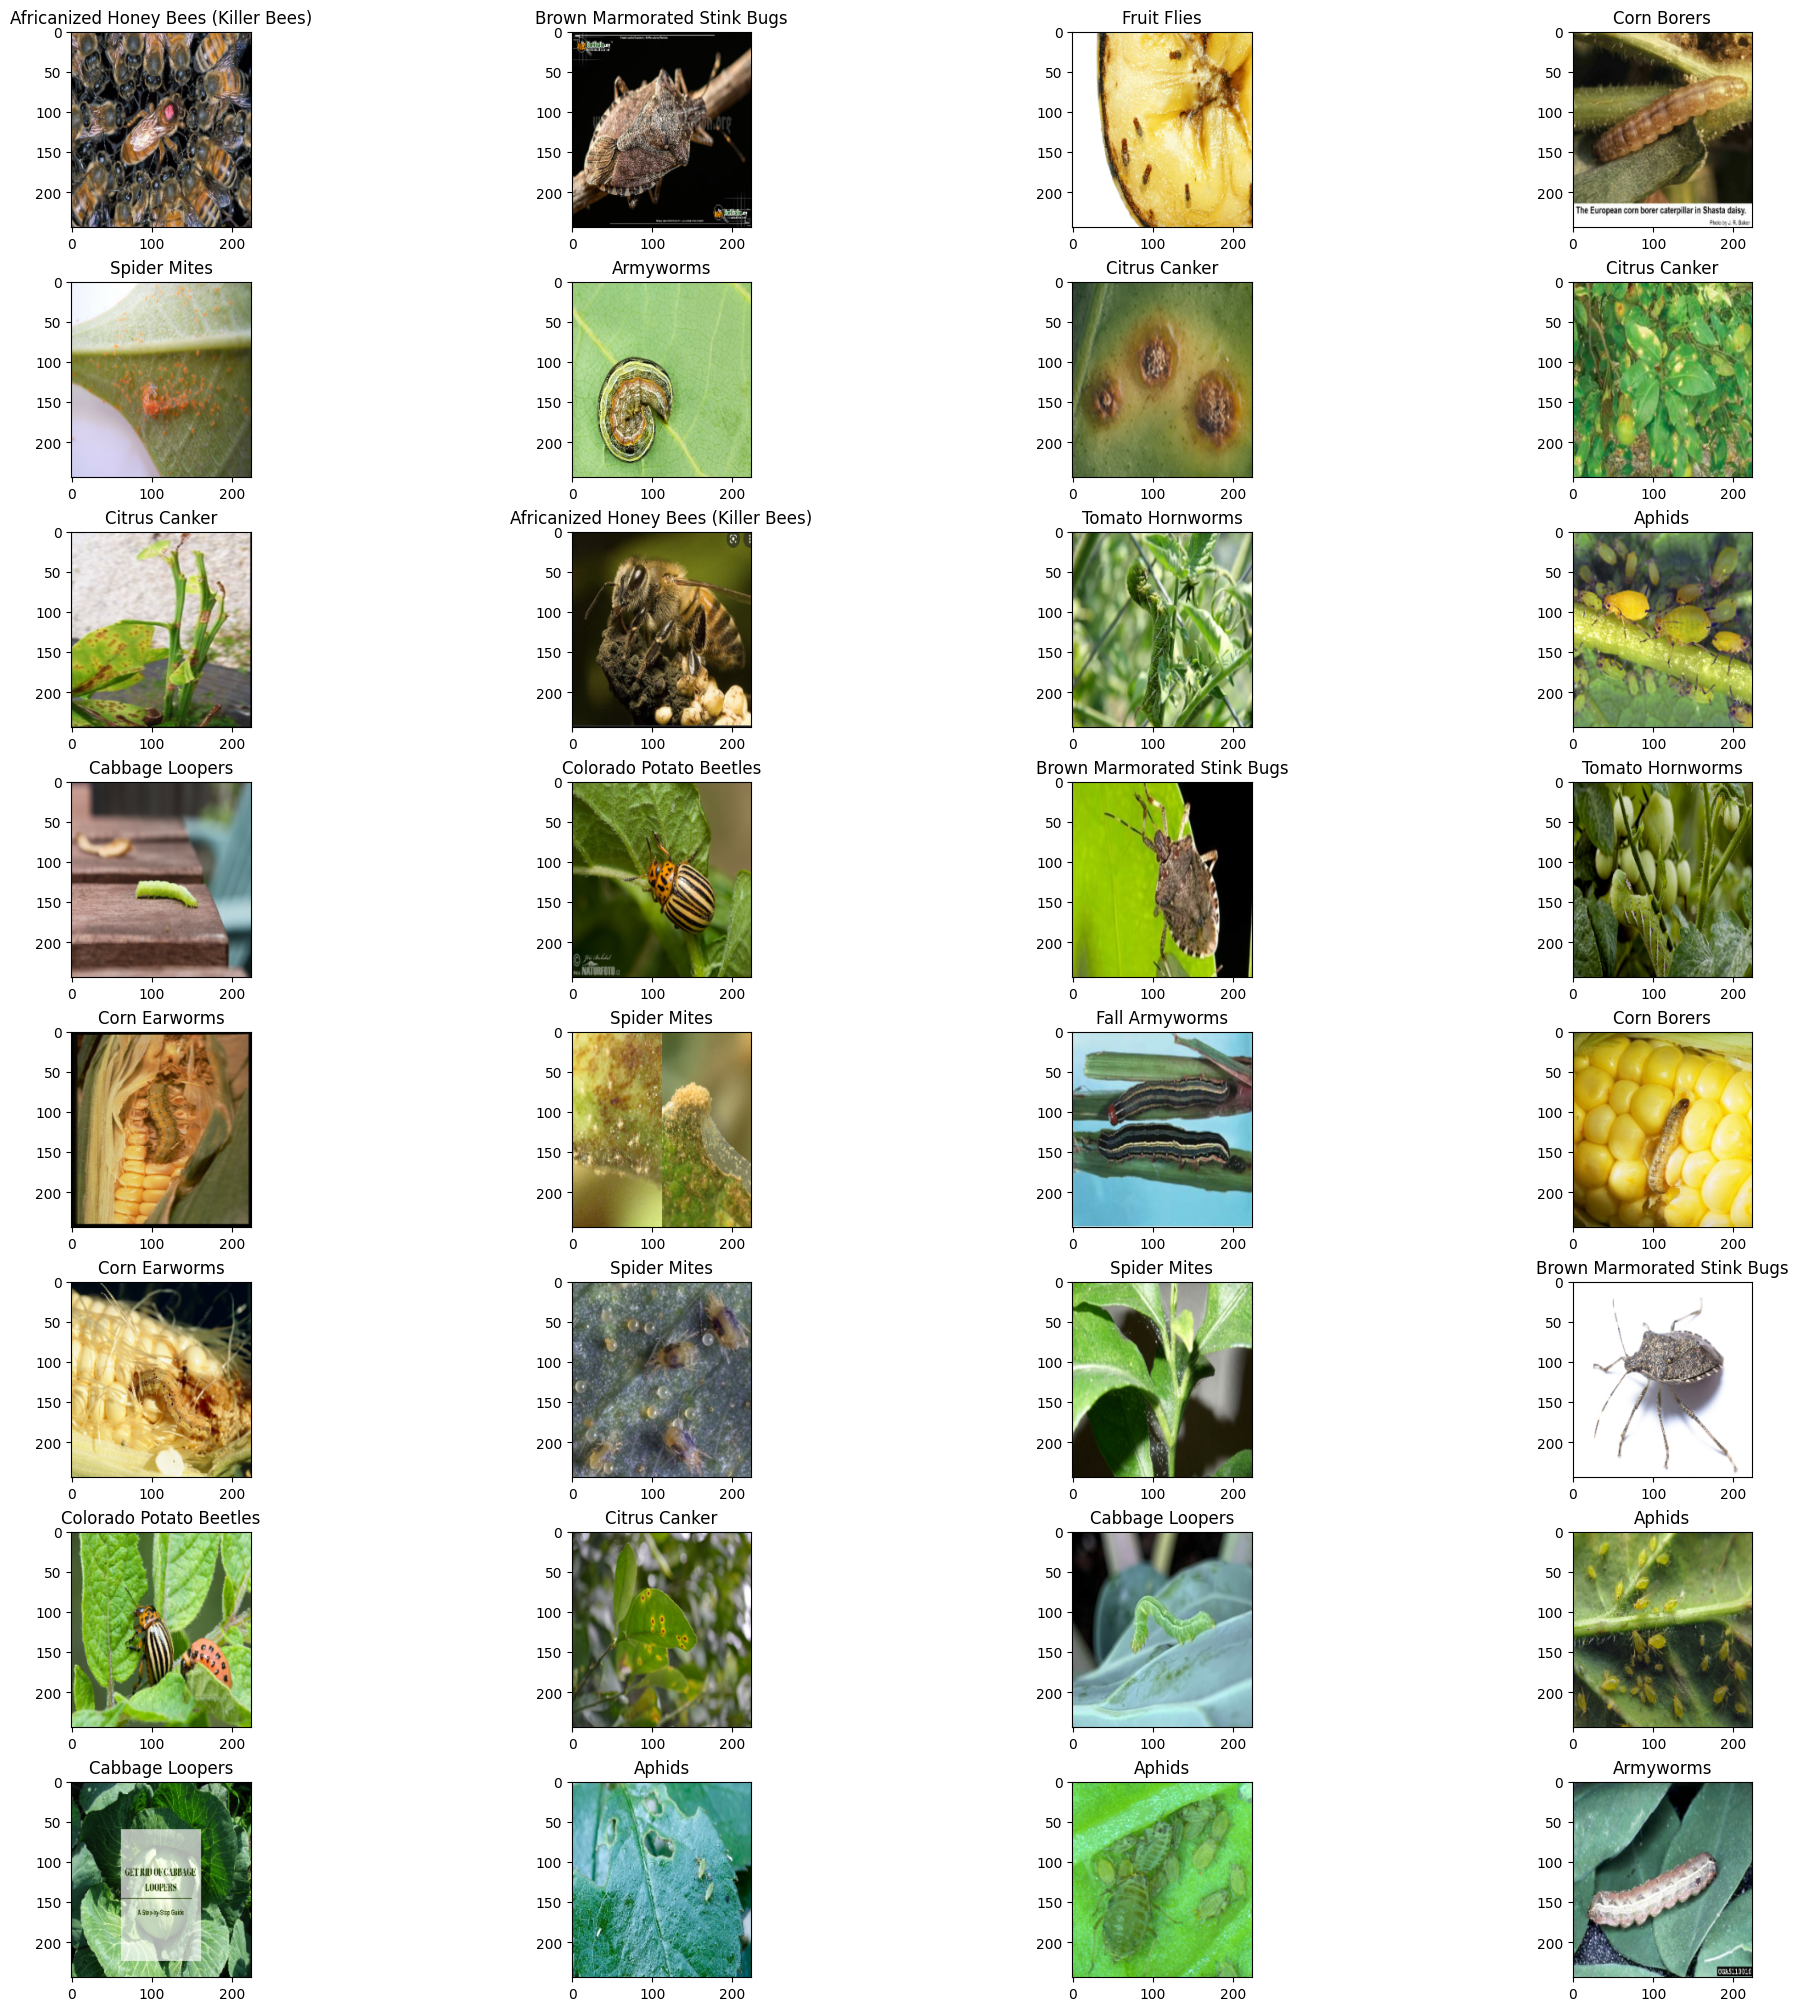

In [152]:
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(20, 20), layout="constrained")

for ax, img, label in zip(axs.flat, batch[0], labels):
    ax.imshow(img)
    ax.set_title(label)


In [76]:
train_data.class_names #type: ignore

['Africanized Honey Bees (Killer Bees)',
 'Aphids',
 'Armyworms',
 'Brown Marmorated Stink Bugs',
 'Cabbage Loopers',
 'Citrus Canker',
 'Colorado Potato Beetles',
 'Corn Borers',
 'Corn Earworms',
 'Fall Armyworms',
 'Fruit Flies',
 'Spider Mites',
 'Thrips',
 'Tomato Hornworms',
 'Western Corn Rootworms']

In [130]:
aug_batch = get_aug_data.next()

In [131]:
aug_batch[0].shape

(32, 256, 256, 3)

In [132]:
aug_batch[1]

array([ 7,  7,  5,  8,  4, 12,  4,  8,  5, 12, 12, 12,  1,  3, 13,  2,  0,
       13, 11,  4,  6, 13, 12, 10,  5,  7, 12,  0, 13, 13,  0, 10])

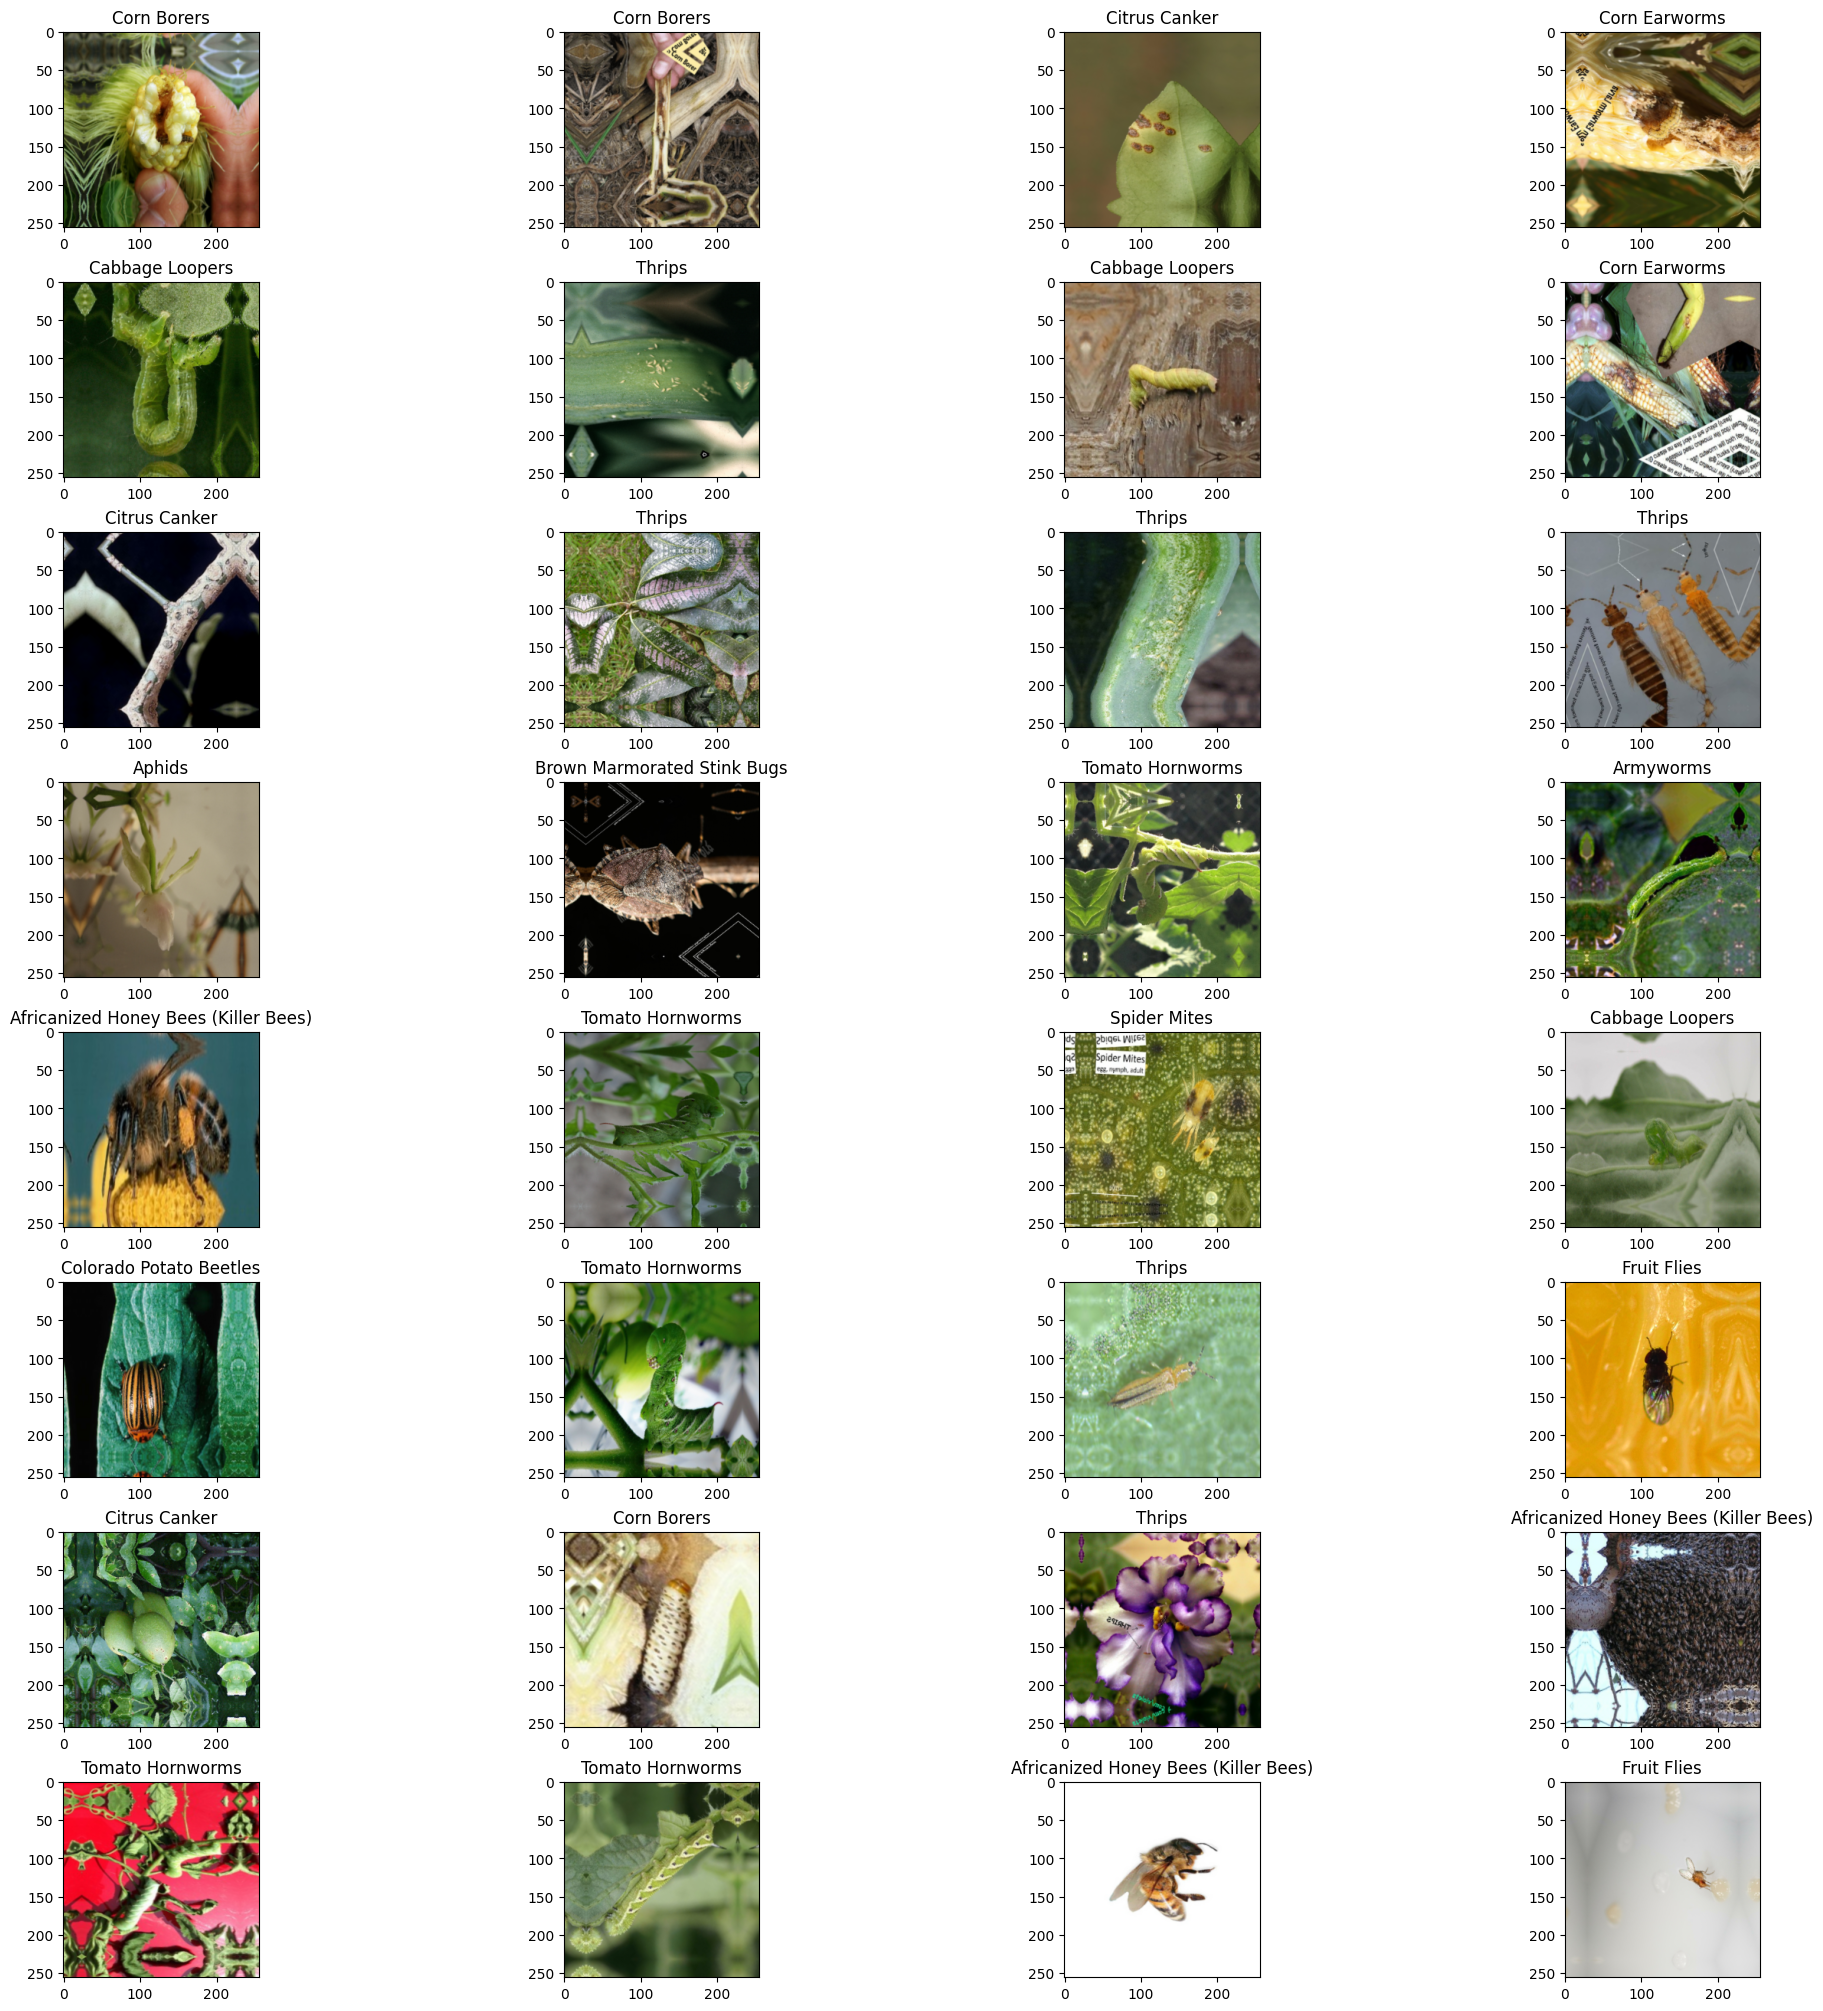

In [135]:
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(20, 20), layout="constrained")

for ax, img, label in zip(axs.flat, aug_batch[0], func(aug_batch[1])):
    ax.imshow(img)
    ax.set_title(label)

In [122]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [123]:
import tensorflow as tf

In [14]:
model = keras.models.load_model(
    Path(
    "c:/Users/USER/Desktop/Farm-Insects-Classification/artifacts/models/updated_base_model.keras"
)
)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model.fit( 
            train_data,
            epochs = 1,
            steps_per_epoch = 60,
            validation_steps = 20,
            validation_data = valid_data,
        )

20/60 [=========>....................] - ETA: 18:11 - loss: 1965.1021 - accuracy: 0.3344WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 60 batches). You may need to use the repeat() function when building your dataset.


60/60 [==============================] - 1136s 19s/step - loss: 1965.1021 - accuracy: 0.3344 - val_loss: 1572.4211 - val_accuracy: 0.2122
